Preprocessing data is messy. You often need to

    Fill in missing values, and possibly create indicator variables so you can track each "fill" you made
    Encode categorical values
    Standardize / feature scaling

And when you have many variables of many types in a dataset, this process can get especially ugly!

And for all its strengths, `sklearn+numpy` just doesn't match pandas for work-ability or viewing.

So here is the code we'd need to run to finish the exercise last class:

In [8]:
# load data

import pandas as pd
url = 'https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/Fannie_Mae_Plus_Data.gzip?raw=true'
fannie_mae = pd.read_csv(url,compression='gzip') 

# one line: standardize all numeric vars 
# WARNING: THIS IS BAD - not all number vars are continuous
# (just illustrating the scale function)

from sklearn import preprocessing
fannie_array = preprocessing.scale(fannie_mae.select_dtypes('number')) # make sure those variables should be std'zed!

# and verify the dataset is normalized
pd.DataFrame(fannie_array).describe().T.round(2) 

# remaining issues you should fix in assignment...
# - only do this to true continuous variables
# - only keep variables of interest
# - impute missing



C:\Users\DonsLaptop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,count,mean,std,min,25%,50%,75%,max
0,135038.0,-0.0,1.0,-1.74,-0.87,0.00,0.87,1.73
1,135038.0,-0.0,1.0,-2.32,-0.77,0.01,0.69,4.47
2,135038.0,0.0,1.0,-1.66,-0.74,-0.23,0.53,9.02
3,135038.0,0.0,1.0,-3.00,-0.81,0.64,0.64,0.64
4,135038.0,-0.0,1.0,-3.78,-0.57,0.28,0.57,1.54
5,134007.0,0.0,1.0,-3.81,-0.56,0.24,0.52,4.05
6,135007.0,0.0,1.0,-1.16,-1.16,0.81,0.81,12.61
7,132396.0,0.0,1.0,-2.81,-0.72,-0.03,0.76,2.67
8,134481.0,0.0,1.0,-7.14,-0.66,0.24,0.82,2.01
9,135038.0,0.0,1.0,-0.14,-0.14,-0.14,-0.14,12.13


In [5]:
fannie_mae.columns

Index(['Loan_Identifier', 'Origination_Channel', 'Seller_Name',
       'Original_Interest_Rate', 'Original_UPB', 'Original_Loan_Term',
       'Original_LTV_(OLTV)', 'Original_Combined_LTV_(CLTV)',
       'Number_of_Borrowers', 'Original_Debt_to_Income_Ratio',
       'Borrower_Credit_Score_at_Origination', 'Loan_purpose', 'Property_type',
       'Number_of_units', 'Occupancy_type', 'Property_state', 'Zip_code_short',
       'Primary_mortgage_insurance_percent', 'Product_type',
       'Co-borrower_credit_score_at_origination', 'Mortgage_Insurance_type',
       'Origination_Date', 'First_payment_date',
       'First_time_home_buyer_indicator', 'UNRATE', 'CPIAUCSL', 'Qdate',
       'rGDP', 'TCMR', 'POILWTIUSDM', 'TTLCONS', 'DEXUSEU', 'BOPGSTB',
       'GOLDAMGBD228NLBM', 'CSUSHPISA', 'MSPUS'],
      dtype='object')

## The cardinal sin of data leakage CHEATING

**Having data in the training sample that you wouldn't have for real world predictions**

Examples
1. y is explicitly in X (yikes)
2. y is a 2018 variable, but there is a 2019 variable in X
3. subtle: y is loan default, but X contains employee ID and some employees are brought in to handle trouble-loans (if you include it, the firm can't use the model to deploy the trouble-loan specialists)
4. if out-of-sample predicted stock movements have R2 above 10%... unlikely! (or: you'll be richer than Bezos soon)
5. this code below

```python
import #a bunch of sklearn stuff
X, y = #load data
X = transform(X) # imputation, encode cat vars, standardize

# and then you either do these lines:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=9,train_size=.8)
model = # something
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest) # using X2 (out-of-sample data), predict y2
accuracy_score(ytest, y_predict)

# or this:
cross_validate(model,X,y)
```


**Q: What's the problem here?**

**A: `transform(X)` used the whole dataset, so the X_training data was altered using info from X_test**


### solving the 5 data leakage examples:

- Preventing 1-3,4: Be very familiar with the data and how it was collected and built 
- Preventing 4,5: Do your data prep _**within**_ CV folds and where the transformations are done using only info from the training 


In [ ]:
x    sample
1    training 
1    training
2    test
1    test

    

```python

# loop over folds 
for train_index, test_index in StratifiedKFold(n_splits=5).split(X,y):

    # .split() yields the indices in train/test sets. use those to get 
    # the x/y vars for each separated out:
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ###################################################################
    # NEW: do the data prep inside this fold, only using training data 
    ###################################################################
    
    # e.g. figure out means/std in Xtrain so we can impute/std
    prep_methods.fit(Xtrain)   # "fit" the transform means "estimate (like in training a model) what to do"
    Xtrain2 = prep_methods.transform(Xtrain)  # apply those to Xtrain to impute and std
    
    # fit/estimate, predict OOS, evaluate and store
    
    model.fit(X_train2,y_train)
    
    ###################################################################
    # NEW: transform the test data the same... 
    ###################################################################
    
    X_test2 = prep_methods.transform(X_test)  # apply TEST data the FIT from the TRAIN data 
   
    y_predict = model.predict(X_test2)
    accuracy.append(   accuracy_score(y_test, y_predict)      )

```


## Pipelines, and our first!

Pipelines combine any number of steps in a row, as long as they have a fit, and a transform

In [18]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import svm

iris = load_iris() # data

# set up the pipeline, which will, given a set of observations 
# 1. fit and apply these steps to the training fold
# 2. in the testing fold, apply the transform and model to predict (no estimation)

classifier_pipeline = make_pipeline(
                                    preprocessing.StandardScaler(),  # clean the data
                                    svm.SVC(C=1)                     # model
                                    )

# ok go!
cross_validate(classifier_pipeline, iris.data, iris.target, cv=5)

{'fit_time': array([0.00101376, 0.0009973 , 0.00097799, 0.00098038, 0.00103855]),
 'score_time': array([0.        , 0.00101566, 0.00101399, 0.        , 0.        ]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [20]:
# question 1: try this with a Nearest Neighbors Classifier (5 min)

from sklearn.neighbors import KNeighborsClassifier

knn_pipe = make_pipeline(
                        preprocessing.StandardScaler(),  # clean the data
                        KNeighborsClassifier()           # model
                        )

# ok go!
cross_validate(knn_pipe, iris.data, iris.target, cv=5)

{'fit_time': array([0.00200057, 0.00197363, 0.00099921, 0.00099683, 0.00099611]),
 'score_time': array([0.00298595, 0.00299191, 0.00199318, 0.0009985 , 0.00199485]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

In [33]:
# question 2: load this altered dataset and add a step to impute the missing values with the column mean

iris2 = load_iris()
X2 = pd.DataFrame(iris2.data)
X2.columns = [1,2,3,4]
X2[2] = X2[2].sample(frac=0.5,random_state=14)
X2[2].describe()
iris2.data = X2

# so add an imputation step to the pipeline! (5 min, use lecture page!)
from sklearn.impute import SimpleImputer
knn_pipe2 = make_pipeline(
                        SimpleImputer(strategy='mean'), 
                        preprocessing.StandardScaler(),  # clean the data
                        KNeighborsClassifier()           # model
                        )
cross_validate(knn_pipe2, iris2.data, iris.target, cv=5)['test_score'].mean()



0.9466666666666667

## summary so far:
- now we can impute and standardize without code-induced data leakage
- your pipeline for the assignment will be more complicated if you want to include categorical vars

## optimizing KNN with `GridSearchCV`

`GridSearchCV` let's use tweak any parameters from any function in the pipeline

Tips:
- If any parameters in your grid are optimal at the boundaries, add more points until optimum is interior
- After you optimize the model, save it as a model object to use


In [34]:
knn_pipe2

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [43]:
# grid search will let you specify all the parameters of the model
# you want to tweak, and the values you want to try

from sklearn.model_selection import GridSearchCV

# set up parameter grid to try
# the parameter grid is a dictionary where key:value pairs are built like:
#     stepName<two underlines>paramName : [list of settings to try]

param_grid = {'kneighborsclassifier__n_neighbors':[2,5,6,7,8,9,10],   
               'standardscaler__with_mean':['True','False'],
               'standardscaler__with_std':['True','False']}

# like a normal estimator, this has not yet been applied to any data
grid = GridSearchCV(knn_pipe2, param_grid=param_grid)
grid.fit(iris2.data, iris.target)
grid.best_params_

# a ha! standardizing (mean=std=True) helps predictions here!

# you can see the WHOLE set of attempts by GridSearch using 
# grid.cv_results_

# # now save that pipeline as a model object!
optimal_knn_model = grid.best_estimator_

### Let's do some post-optimization diagnostics

1. print out scores
2. graphically explore predictionsd
3. in classification problems print out ealrfuhgeporihaeoruh


In [46]:
# print k-fold scoring (like before)
cross_validate(optimal_knn_model, iris2.data, iris.target, cv=5)

{'fit_time': array([0.00598073, 0.00398898, 0.00398707, 0.00398397, 0.0050199 ]),
 'score_time': array([0.0039885 , 0.00299406, 0.00299549, 0.00199556, 0.00295806]),
 'test_score': array([0.93333333, 0.93333333, 0.96666667, 0.93333333, 1.        ])}

In [47]:
###########################################################
# use classification_report to see which types of Y values 
# your prediction performs better/worse on
###########################################################

# to use class_report, we need some predicted y values, so
# make a fold and generate predicted values

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(iris2.data, iris.target, random_state=9,train_size=.5)
y_pred = optimal_knn_model.fit(Xtrain, ytrain).predict(Xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest,
                            y_pred,
                            target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        27
  versicolor       0.89      0.96      0.93        26
   virginica       0.95      0.86      0.90        22

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



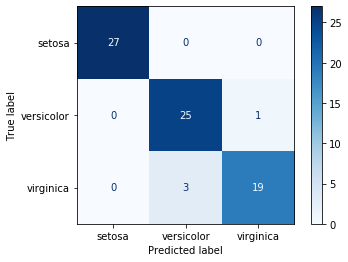

In [48]:
#################################################################
# use confusion_matrix see exactly model gets predictions wrong
#################################################################

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(optimal_knn_model, Xtest, ytest,   # model and test data
                      display_labels=iris.target_names,  # labels
                      cmap=plt.cm.Blues,                 # colors
                      normalize=None)                    # turns on/off fractions (within row)

# note: the normalize parameter is a little weird but changes the outputs 
# between several useful modes! normalize must be
#    = None   (just plots the # in that cell)
#    = 'true' (rows add to 100%, meaning: cell # divided by # in that row/true-y outcome)
#    = 'pred' (cols add to 100%, meaning: cell # divided by # in that col/predicted-y)
#    = 'all'  (cell # divided by sample size)

## Final Summary

- We've now seen more post model diagnostics 
- We can specify the models in `make_pipeline` alongside data cleaning/preprocessing steps that improve model performance without introducing data leakage. 
- There are many imputation, and scaling methods available in `sklearn`, and which one you use depends on the use-case. (Read about and try several!)
- Your pipeline for the assignment will be more complicated if you want to include categorical vars
- You can optimize all of the parameters throughout your pipeline using `GridSearchCV`
    - `GridSearchCV` also allows you to specify how you create folds
    - Which leads us to...

**LAST BIG POINT:** 
- Must of your projects involve an important time series dimension. (Ex: predicting stock returns) 
- In these cases, `KFold` and `StratifiedKFold` won't work (you can't have 1985 in the test sample)
- See: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
